### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-2**
#### Logistic Regression

## Import Library
Gather all necessary libraries for data manipulation and logistic regression modeling


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import random
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


## Load Dataset
Read the dataset into a data frame to start working with it. 

In [38]:
filepath = None
filepath = "framingham.csv"
df = pd.read_csv(filepath)

## Explore the Data
Get an overview of the dataset by looking at the first few rows, summary statistics, and data types.

In [39]:
print("\nHead:\n", df.head())
print("\nShape:\n", df.shape)
print("\nColumns:\n", df.columns)
print("\nDescribe:\n", df.describe())
print("\n Describe:\n", df.describe())
print("\n Data Types:\n", df.dtypes)


Head:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1         

## Check Missing Values

In [40]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## Handling Missing Data    

In [41]:
df['education']  = df['education'].fillna(df['education'].mean())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds']     = df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol']    = df['totChol'].fillna(df['totChol'].mean())
df['BMI']        = df['BMI'].fillna(df['BMI'].mean())
df['heartRate']  = df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']    = df['glucose'].fillna(df['glucose'].mean())

print("\nMissing Values after replacing with mean:")
print(df.isnull().sum())



Missing Values after replacing with mean:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


## Define Features and Target
Separate the dataset into input features (independent variables) and the target variable (dependent variable, "TenYearCHD")

In [42]:
X = np.array(df.iloc[:, :-1].values)
y = np.array(df.iloc[:, -1].values)

print("Shape of X: ",X.shape, "Shape of y: ",y.shape)

Shape of X:  (4240, 15) Shape of y:  (4240,)


### *Scaling the dataset*

In [43]:
def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled

print("\nX before scaling:")
print(X[:5])
X = X.astype(float)

X = min_max_scaler(X)
print("\nX after scaling:")
print(X[:5])


X before scaling:
[[  1.    39.     4.     0.     0.     0.     0.     0.     0.   195.
  106.    70.    26.97  80.    77.  ]
 [  0.    46.     2.     0.     0.     0.     0.     0.     0.   250.
  121.    81.    28.73  95.    76.  ]
 [  1.    48.     1.     1.    20.     0.     0.     0.     0.   245.
  127.5   80.    25.34  75.    70.  ]
 [  0.    61.     3.     1.    30.     0.     0.     1.     0.   225.
  150.    95.    28.58  65.   103.  ]
 [  0.    46.     3.     1.    23.     0.     0.     0.     0.   285.
  130.    84.    23.1   85.    85.  ]]

X after scaling:
[[1.         0.18421053 1.         0.         0.         0.
  0.         0.         0.         0.14940577 0.10638298 0.23280423
  0.27702375 0.36363636 0.10451977]
 [0.         0.36842105 0.33333333 0.         0.         0.
  0.         0.         0.         0.24278438 0.17730496 0.34920635
  0.31968008 0.51515152 0.10169492]
 [1.         0.42105263 0.         1.         0.28571429 0.
  0.         0.         0.        

## Split the Dataset
Divide the data into training and testing sets to evaluate the model's performance on unseen data. 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nX_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)


X_train shape:  (3392, 15) y_train shape:  (3392,)
X_test shape:  (848, 15) y_test shape:  (848,)


## **Train the Logistic Regression Model**

### 1. Creating the Sigmoid Function


In [45]:
def sigmoid(z):
    g = None
    z = z.astype(float)
    g = 1 / (1 + np.exp(-z))
    return g

### 2. Computing the loss Function


In [46]:
def loss_function(X, y, w, b):
      m, n = X.shape

      total_cost = 0
      y_pred = sigmoid(np.dot(X, w.T) + b)
      total_cost = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

      return total_cost

### 3. Computing the Gradient of the Loss


In [47]:
def compute_gradient_logistic_regression(X, y, w, b):
   m, n = X.shape
   dj_dw = np.zeros(w.shape)
   dj_db = 0
   y_pred = sigmoid(np.dot(X, w.T) + b)
   dj_dw = np.dot((y_pred - y), X) / m
   dj_db = np.sum(y_pred - y) / m

   return dj_db, dj_dw

### 4. Training the model using Batch Gradient Descent


In [48]:
def batch_gradient_descent_logistic_regression(X, y, w_in, b_in, alpha, num_iters):
    m = len(X)

    loss_hist = []

    w_in = copy.deepcopy(w_in)
    b_in = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic_regression(X, y, w_in, b_in)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        loss = loss_function(X, y, w_in, b_in)
        loss_hist.append(loss)

        if i % 1000 == 0:
            print(f'Loss after iteration {i}: {loss}')

    return w_in, b_in, loss_hist

In [49]:
random_seed = 17
np.random.seed(random_seed)

def initialize_parameters():
    initial_w = None
    initial_b = None
    alpha = None
    alpha = random.uniform(0.01, 0.09)

    initial_w = np.random.normal(0, 1, X_train.shape[1])
    initial_b = np.random.normal(0, 1, 1)

    return initial_w,initial_b,alpha

In [50]:
initial_w, initial_b, alpha = initialize_parameters()
num_iterations = 10000

print("Shape of w: ",initial_w.shape)
print("Shape of b: ",initial_b.shape)


w,b,loss_hist = batch_gradient_descent_logistic_regression(X_train ,y_train, initial_w, initial_b, alpha, num_iterations)
print("optimized parameter values w:", w)
print("optimized parameter value b:", b)

print("Shape of w: ",w.shape)
print("Shape of b: ",b.shape)


Shape of w:  (15,)
Shape of b:  (1,)
Loss after iteration 0: 0.5337047028880955
Loss after iteration 1000: 0.4069195871746832
Loss after iteration 2000: 0.39376241880991475
Loss after iteration 3000: 0.38768982793976836
Loss after iteration 4000: 0.38447856305409506
Loss after iteration 5000: 0.38262557761378774
Loss after iteration 6000: 0.3814647347617624
Loss after iteration 7000: 0.3806775799563914
Loss after iteration 8000: 0.3801050032583732
Loss after iteration 9000: 0.37966430367280446
optimized parameter values w: [ 0.50080231  2.22568856 -0.15616643  0.10473748  1.08451898  0.26832891
  0.59117052  0.38159308  0.50096443  0.20961449  2.41185255  0.15044376
 -0.76846202 -0.33688722  1.21360043]
optimized parameter value b: [-3.97338931]
Shape of w:  (15,)
Shape of b:  (1,)


### 5. Final Train and Test Accuracy


In [51]:
def predict(X, w, b):
      m, n = X.shape
      p = np.zeros(m)
      y_pred = sigmoid(np.dot(X, w.T) + b)

      for i in range(m):
          if y_pred[i] > 0.5:
              p[i] = 1
          else:
              p[i] = 0
              
      return p

In [52]:
p_train = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p_train == y_train) * 100))
p_test = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p_test == y_test) * 100))

Train Accuracy: 85.347877
Test Accuracy: 86.320755


Now, we plot the loss function values for every iteration.

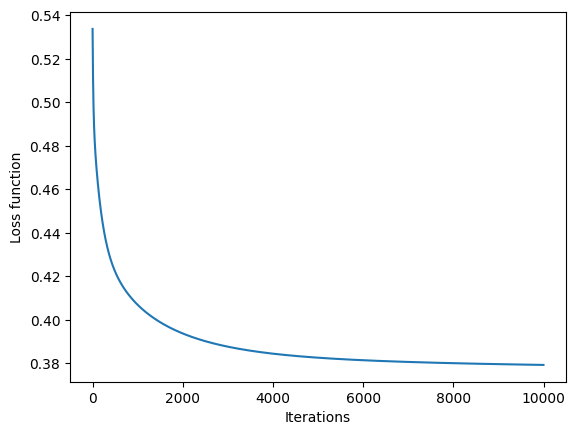

In [53]:
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()

### The Confusion Matrix and Classification Report on Test Data


Confusion Matrix:
[[721   1]
 [115  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       722
           1       0.92      0.09      0.16       126

    accuracy                           0.86       848
   macro avg       0.89      0.54      0.54       848
weighted avg       0.87      0.86      0.81       848



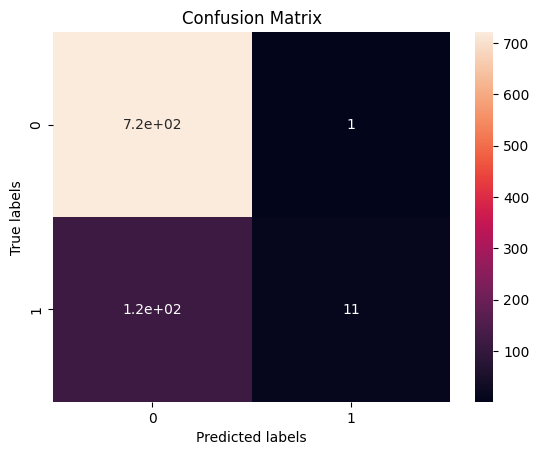

In [58]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, p_test))
print("\nClassification Report:")
print(classification_report(y_test, p_test))

cm = confusion_matrix(y_test, p_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()
